In [1]:
# !pip install pandas matplotlib seaborn 

In [50]:
import torch.nn as nn 
import torchvision
import torch 
from glob import glob
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import scipy.stats as st
import os
from PIL import Image

In [2]:
# For v3
df = pd.read_csv("/home/shirshak/BPEye_Project_2024/zzz_tests/df_v2_H_W_Mean-Intensity_labelsv222.csv")
df

Image Name  height  width label train_val_test  \
0       TRAIN000006.jpg    1866   1866   NRG           test   
1       TRAIN000016.jpg    1659   1659   NRG           test   
2       TRAIN000037.jpg    3029   3029   NRG           test   
3       TRAIN000040.jpg    1567   1567   NRG           test   
4       TRAIN000045.jpg    1862   1862   NRG           test   
...                 ...     ...    ...   ...            ...   
101437  TRAIN100001.jpg    3359   3359    RG            val   
101438  TRAIN100005.jpg    2251   2251    RG            val   
101439  TRAIN100175.jpg    3320   3320    RG            val   
101440  TRAIN100891.jpg    2335   2335    RG            val   
101441  TRAIN100894.jpg    2962   2962    RG            val   

        Mean Intensity Value  \
0                  87.945122   
1                  47.949043   
2                  82.943741   
3                  87.737770   
4                  88.348709   
...                      ...   
101437             88.176414   
101438             18.805088   
101439             76.535561   
101440             90.698128   
101441             84.923210   

                               Mean Intensity Value R,G,B  
0       [123.17466735839844, 82.47907257080078, 58.181...  
1       [82.59918975830078, 50.25592803955078, 10.9920...  
2       [131.36135864257812, 75.21183013916016, 42.258...  
3       [119.17854309082031, 84.73666381835938, 59.298...  
4       [123.76273345947266, 82.8411636352539, 58.4422...  
...                                                   ...  
101437  [98.70320129394531, 93.9019775390625, 71.92407...  
101438  [29.535009384155273, 18.62687873840332, 8.2533...  
101439  [144.0529022216797, 58.64748001098633, 26.9063...  
101440  [122.38795471191406, 86.87985229492188, 62.826...  
101441  [111.66764068603516, 87.20738983154297, 55.894...  

[101442 rows x 7 columns]

In [3]:
df['Height Range'] = pd.cut(df['height'], bins=[df['height'].min()-1, 1000, 2000, 3000, 4000, df['height'].max()+1], labels=[f"{df['height'].min()}-1000","1000-2000", "2000-3000", f"3000-4000", f"4000-{df['height'].max()}"])

In [4]:
root_dir = '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val'

In [5]:
image_locations = df[df['Height Range'] == "2000-3000"].apply(lambda row: os.path.join(root_dir, row['train_val_test'], row['label'], row['Image Name']) ,axis=1)

In [6]:
image_locations

6         /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
9         /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
10        /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
12        /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
13        /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
                                ...                        
101435    /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
101436    /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
101438    /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
101440    /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
101441    /mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYE...
Length: 65266, dtype: object

In [7]:
# image_locations.str.split('/')

In [8]:
image_locations[image_locations.apply(lambda x: '/RG' in x)].tolist()

['/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/test/RG/TRAIN000122.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/test/RG/TRAIN000127.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/test/RG/TRAIN000188.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/test/RG/TRAIN000498.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/test/RG/TRAIN000983.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/test/RG/TRAIN001695.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/test/RG/TRAIN003117.jpg',
 '/mnt/Enterprise2/shirshak

In [9]:
image_locations[image_locations.apply(lambda x: '/NRG' in x)].tolist()

['/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/test/NRG/TRAIN000082.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/test/NRG/TRAIN000103.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/test/NRG/TRAIN000123.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/test/NRG/TRAIN000137.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/test/NRG/TRAIN000146.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/test/NRG/TRAIN000158.jpg',
 '/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/test/NRG/TRAIN000161.jpg',
 '/mnt/Enterprise2/s

In [10]:
# df['Directory Name'].split('/')[-3]

In [11]:
df[df['height'] <= 215]

Image Name  height  width label train_val_test  \
22118  TRAIN015458.jpg     211    211   NRG          train   
53742  TRAIN056176.jpg     210    210   NRG          train   

       Mean Intensity Value  \
22118             84.154716   
53742             90.547455   

                              Mean Intensity Value R,G,B Height Range  
22118  [130.6866912841797, 81.65771484375, 40.1197395...     210-1000  
53742  [138.4631805419922, 89.52154541015625, 43.6576...     210-1000

In [12]:
df[df['height'] >= 4000]

Image Name  height  width label train_val_test  \
152     TRAIN001511.jpg    4204   4204   NRG           test   
415     TRAIN004000.jpg    4031   4031   NRG           test   
539     TRAIN005136.jpg    4031   4031   NRG           test   
1387    TRAIN014069.jpg    4032   4032   NRG           test   
1935    TRAIN019663.jpg    4031   4031   NRG           test   
...                 ...     ...    ...   ...            ...   
99257   TRAIN082497.jpg    4320   4320   NRG            val   
99543   TRAIN085415.jpg    4030   4030   NRG            val   
100516  TRAIN095200.jpg    4029   4029   NRG            val   
100701  TRAIN097191.jpg    4297   4297   NRG            val   
100818  TRAIN098411.jpg    4249   4249   NRG            val   

        Mean Intensity Value  \
152                64.167259   
415                85.471985   
539                96.713318   
1387               82.448097   
1935               25.394218   
...                      ...   
99257              74.730896   
99543             104.293289   
100516             90.541809   
100701             85.520645   
100818             80.743637   

                               Mean Intensity Value R,G,B Height Range  
152     [81.71659851074219, 60.35480880737305, 50.4303...    4000-4493  
415     [118.77794647216797, 82.51343536376953, 55.124...    4000-4493  
539     [115.97549438476562, 92.367919921875, 81.79657...    4000-4493  
1387    [96.12161254882812, 78.73976135253906, 72.4829...    4000-4493  
1935    [25.218412399291992, 25.13967514038086, 25.824...    4000-4493  
...                                                   ...          ...  
99257   [92.66151428222656, 72.9986572265625, 58.53250...    4000-4493  
99543   [121.80785369873047, 102.15425872802734, 88.91...    4000-4493  
100516  [96.1253890991211, 93.45884704589844, 82.04120...    4000-4493  
100701  [112.88485717773438, 79.94485473632812, 63.732...    4000-4493  
100818  [95.90605926513672, 78.86139678955078, 67.4634...    4000-4493  

[359 rows x 8 columns]

In [13]:
df['height'].max()

4493

In [14]:
df[df['height'] == 4493]

Image Name  height  width label train_val_test  \
81448  TRAIN092102.jpg    4493   4493   NRG          train   

       Mean Intensity Value  \
81448             39.406109   

                              Mean Intensity Value R,G,B Height Range  
81448  [49.08355712890625, 36.808509826660156, 32.326...    4000-4493

In [15]:
df['height'].min()

210

In [16]:
df[df['height'] == 210]

Image Name  height  width label train_val_test  \
53742  TRAIN056176.jpg     210    210   NRG          train   

       Mean Intensity Value  \
53742             90.547455   

                              Mean Intensity Value R,G,B Height Range  
53742  [138.4631805419922, 89.52154541015625, 43.6576...     210-1000

In [17]:
df.loc[36879]['Image Name']

'TRAIN034480.jpg'

In [18]:
from torchvision.transforms import Lambda
from torchvision.io import read_image

# 36879, 43269
location = 53742 
img = Lambda(read_image)(os.path.join('/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/preprocessed_cropped_separated_train_test_val/', df.loc[location]['train_val_test'], df.loc[location]['label'], df.loc[location]['Image Name']))

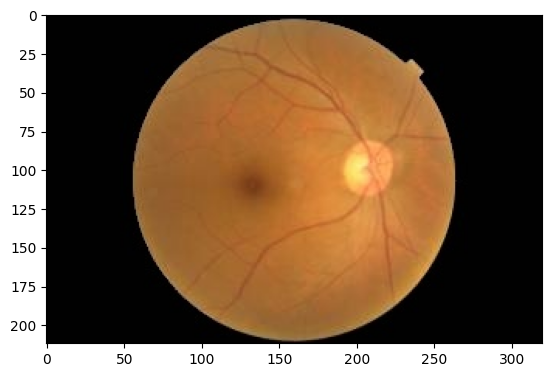

In [19]:
# plt.imshow(Lambda(read_image)('/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/overall_data/1/1/TRAIN034480.jpg').permute(1,2,0))
plt.imshow(Lambda(read_image)('/mnt/Enterprise2/shirshak/GLAUCOMA_DATASET_EYEPACS_AIROGS_ZENODO/overall_data/3/3/TRAIN056176.jpg').permute(1,2,0))

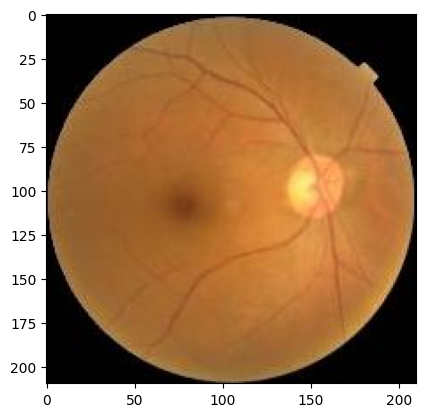

In [20]:
# We see that the image is clearly not cropped properly....
# So what might have happened??
plt.imshow(img.permute(1,2,0))

In [21]:
c,h,w = img.shape


left_half_axis_1d = img[0, h//2,:w//2].tolist()
top_half_axis_1d = img[0, :h//2,w//2].tolist()

right_half_axis_1d = img[0, h//2,w//2:].tolist()
bottom_half_axis_1d = img[0, h//2:,w//2].tolist()

h_left = next((i for i, x in enumerate(left_half_axis_1d) if x != 0), None) # Gives the index of first non zero element and returns None after it has found first non zero element
w_top = next((i for i, x in enumerate(top_half_axis_1d) if x != 0), None) # Gives the index of first non zero element and returns None after it has found first non zero element


h_right = next((len(right_half_axis_1d) - 1 - i for i, x in enumerate(reversed(right_half_axis_1d)) if x != 0), None) # Gives the index of first non zero element and returns None after it has found first non zero element
w_bottom = next((len(bottom_half_axis_1d) - 1 - i for i, x in enumerate(reversed(bottom_half_axis_1d)) if x != 0), None) # Gives the index of first non zero element and returns None after it has found first non zero element


In [22]:
left_half_axis_1d

[22,
 136,
 140,
 143,
 151,
 154,
 147,
 152,
 149,
 146,
 146,
 144,
 147,
 147,
 148,
 147,
 147,
 146,
 146,
 146,
 146,
 146,
 147,
 147,
 148,
 148,
 148,
 148,
 150,
 150,
 150,
 150,
 152,
 153,
 154,
 154,
 155,
 155,
 154,
 154,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 155,
 153,
 154,
 156,
 157,
 157,
 156,
 157,
 156,
 154,
 154,
 154,
 153,
 153,
 152,
 151,
 151,
 151,
 149,
 147,
 146,
 145,
 142,
 139,
 136,
 137,
 134,
 130,
 129,
 130,
 130,
 130,
 129,
 132,
 133,
 137,
 139,
 142,
 146,
 150,
 151,
 152,
 155,
 161,
 163,
 164,
 165,
 167,
 169,
 171,
 173,
 175,
 176,
 180,
 183,
 187,
 191,
 193]

In [23]:
# Extract x and y
x = df['height']
y = df['width']
# Define the borders
# deltaX = (max(x) - min(x))/10
# deltaY = (max(y) - min(y))/10
xmin = min(x) #- deltaX
xmax = max(x) #+ deltaX
ymin = min(y) #- deltaY
ymax = max(y) #+ deltaY
print(xmin, xmax, ymin, ymax)

210 4493 210 4493


In [24]:
print(xmin, xmax, ymin, ymax)

210 4493 210 4493


/tmp/ipykernel_272606/2560168406.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby(['Height Range', 'Width Range']).size().reset_index(name='Count')


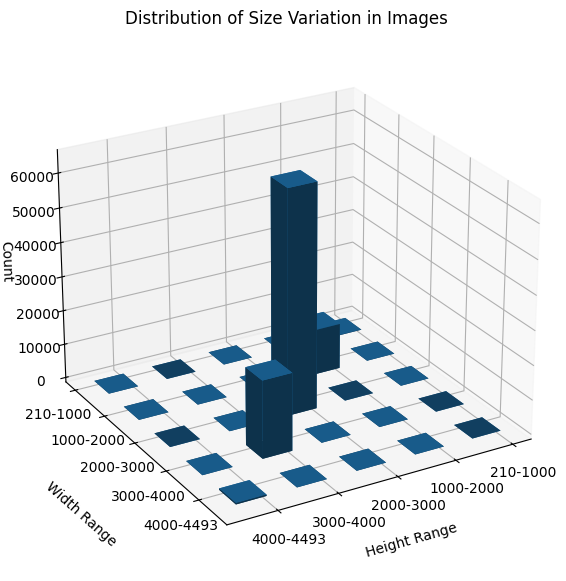

In [25]:
# Define range buckets for height and width
height_bins = [xmin-1, 1000, 2000, 3000, 4000, xmax+1] # we take xmin-1 because it doesnot include the minimum case when we only do xmin
width_bins = [ymin-1, 1000, 2000, 3000, 4000, ymax+1]

# Add bucketed columns
df['Height Range'] = pd.cut(df['height'], bins=height_bins, labels=[f"{xmin}-1000","1000-2000", "2000-3000", f"3000-4000", f"4000-{xmax}"])
df['Width Range'] = pd.cut(df['width'], bins=width_bins, labels=[f"{ymin}-1000","1000-2000", "2000-3000", "3000-4000", f"4000-{ymax}"])

# Count combinations of height and width ranges
count_data = df.groupby(['Height Range', 'Width Range']).size().reset_index(name='Count')

# Prepare data for 3D plotting
height_categories = np.array([f"{xmin}-1000","1000-2000", "2000-3000", f"3000-4000", f"4000-{xmax}"])
width_categories = np.array([f"{xmin}-1000","1000-2000", "2000-3000", f"3000-4000", f"4000-{xmax}"])
height_indices = {cat: i for i, cat in enumerate(height_categories)}
width_indices = {cat: i for i, cat in enumerate(width_categories)}

count_data['Height Index'] = count_data['Height Range'].map(height_indices)
count_data['Width Index'] = count_data['Width Range'].map(width_indices)

# Extract x, y, z data for plotting
x = count_data['Height Index']
y = count_data['Width Index']
z = count_data['Count']

# Create 3D plot
fig = plt.figure(figsize=(18, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.bar3d(x, y, np.zeros(len(z)), 0.5, 0.5, z, shade=True)

# Set tick labels for categorical axes
ax.set_xticks(range(len(height_categories)))
ax.set_xticklabels(height_categories)
ax.set_yticks(range(len(width_categories)))
ax.set_yticklabels(width_categories)

# Set axis labels
ax.set_xlabel('Height Range', labelpad=10)
ax.set_ylabel('Width Range', labelpad=20)
ax.set_zlabel('Count')

# ax.tick_params(axis='x', pad=10)
# ax.tick_params(axis='y', pad=10)

ax.view_init(25, 60)
plt.title('Distribution of Size Variation in Images')
plt.show()

In [26]:
df['Height Range'].isnull().sum(), df['Width Range'].isnull().sum()

(0, 0)

In [27]:
# df[df['Height Range'].isnull()]
# df[df['Width Range'].isnull()]

In [28]:
df['Height Range'].value_counts()

Height Range
2000-3000    65266
3000-4000    22476
1000-2000    13302
4000-4493      359
210-1000        39
Name: count, dtype: int64

In [29]:
df['Width Range'].value_counts()

Width Range
2000-3000    65266
3000-4000    22476
1000-2000    13302
4000-4493      359
210-1000        39
Name: count, dtype: int64

In [30]:
df['label'].value_counts()

label
NRG    98172
RG      3270
Name: count, dtype: int64

In [31]:
height_ranges = [xmin, 1000, 2000, 3000, 4000, xmax]
width_ranges = [ymin, 1000, 2000, 3000, 4000, ymax]

In [32]:
for i in range(len(height_ranges)-1):
    for j in range(len(width_ranges)-1):
        print(f"Count of height[{height_ranges[i]}-{height_ranges[i+1]}] & width[{width_ranges[j]}-{width_ranges[j+1]}] : {((df['Height Range'] == f'{height_ranges[i]}-{height_ranges[i+1]}') & (df['Width Range'] == f'{width_ranges[j]}-{width_ranges[j+1]}')).sum()}")

Count of height[210-1000] & width[210-1000] : 39
Count of height[210-1000] & width[1000-2000] : 0
Count of height[210-1000] & width[2000-3000] : 0
Count of height[210-1000] & width[3000-4000] : 0
Count of height[210-1000] & width[4000-4493] : 0
Count of height[1000-2000] & width[210-1000] : 0
Count of height[1000-2000] & width[1000-2000] : 13302
Count of height[1000-2000] & width[2000-3000] : 0
Count of height[1000-2000] & width[3000-4000] : 0
Count of height[1000-2000] & width[4000-4493] : 0
Count of height[2000-3000] & width[210-1000] : 0
Count of height[2000-3000] & width[1000-2000] : 0
Count of height[2000-3000] & width[2000-3000] : 65266
Count of height[2000-3000] & width[3000-4000] : 0
Count of height[2000-3000] & width[4000-4493] : 0
Count of height[3000-4000] & width[210-1000] : 0
Count of height[3000-4000] & width[1000-2000] : 0
Count of height[3000-4000] & width[2000-3000] : 0
Count of height[3000-4000] & width[3000-4000] : 22476
Count of height[3000-4000] & width[4000-4493] 

In [33]:
print(f"Count of height[{xmin}-1000] & width[{ymin}-1000] : {((df['Height Range'] == f'{xmin}-1000') & (df['Width Range'] == f'{ymin}-1000')).sum()}")
print(f"Count of height[1000-2000] & width[2000-3000] : {((df['Height Range'] == f'1000-2000') & (df['Width Range'] == f'2000-3000')).sum()}")

Count of height[210-1000] & width[210-1000] : 39
Count of height[1000-2000] & width[2000-3000] : 0


In [34]:
df['Mean Intensity Value'].min(), df['Mean Intensity Value'].max()

(3.359330892562866, 172.22096252441406)

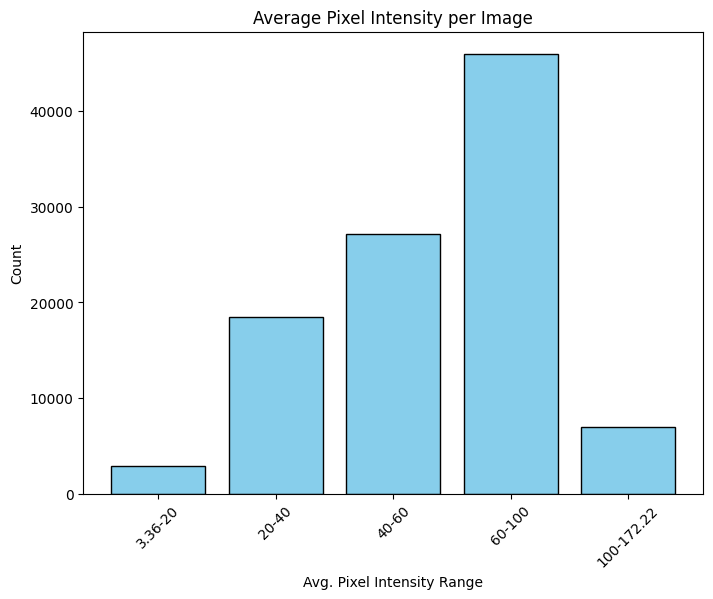

In [35]:
intensity_min = df['Mean Intensity Value'].round(2).min()
intensity_max = df['Mean Intensity Value'].round(2).max()

bins = [intensity_min-1, 20, 40, 60, 100, intensity_max] # because minimum value won't be taken so take range of min_value -1 
labels = [f'{intensity_min}-20', '20-40', '40-60', '60-100', f'100-{intensity_max}']

# Create a new column for the bucket ranges
df['Intensity Range'] = pd.cut(df['Mean Intensity Value'], bins=bins, labels=labels, include_lowest=True)

# Count the number of images in each bucket
distribution = df['Intensity Range'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(distribution.index, distribution.values, color='skyblue', edgecolor='black')
plt.xlabel('Avg. Pixel Intensity Range')
plt.ylabel('Count')
plt.title('Average Pixel Intensity per Image')
plt.xticks(rotation=45)
plt.show()

In [36]:
df["Intensity Range"].isnull().sum()

1

In [39]:
df[(df['Intensity Range']== "3.36-20")].sort_values(by=["Mean Intensity Value"], ascending=True)

Image Name  height  width label train_val_test  \
15950  TRAIN007472.jpg    2251   2251   NRG          train   
95319  TRAIN043140.jpg    2253   2253   NRG            val   
50001  TRAIN051379.jpg    2252   2252   NRG          train   
88838  TRAIN005812.jpg    2251   2251    RG          train   
34189  TRAIN030981.jpg    2251   2251   NRG          train   
...                ...     ...    ...   ...            ...   
35053  TRAIN032089.jpg    2251   2251   NRG          train   
15709  TRAIN007148.jpg    2253   2253   NRG          train   
82194  TRAIN093046.jpg    2256   2256   NRG          train   
11316  TRAIN001482.jpg    2255   2255   NRG          train   
21591  TRAIN014771.jpg    2960   2960   NRG          train   

       Mean Intensity Value  \
15950              3.359331   
95319              3.782629   
50001              4.098524   
88838              4.352540   
34189              4.403353   
...                     ...   
35053             19.998503   
15709             19.998587   
82194             19.998827   
11316             19.999262   
21591             19.999998   

                              Mean Intensity Value R,G,B Height Range  \
15950  [3.368234872817993, 3.950200080871582, 2.75955...    2000-3000   
95319  [5.5697245597839355, 4.066934585571289, 1.7112...    2000-3000   
50001  [7.547084808349609, 3.2919762134552, 1.4565107...    2000-3000   
88838  [6.742893695831299, 4.4266462326049805, 1.8880...    2000-3000   
34189  [6.683808326721191, 4.611200332641602, 1.91505...    2000-3000   
...                                                  ...          ...   
35053  [36.41930389404297, 19.489856719970703, 4.0863...    2000-3000   
15709  [33.023475646972656, 20.92214012145996, 6.0501...    2000-3000   
82194  [38.493682861328125, 15.741498947143555, 5.761...    2000-3000   
11316  [34.60063552856445, 16.38860321044922, 9.00854...    2000-3000   
21591  [20.674007415771484, 18.3691463470459, 20.9568...    2000-3000   

      Width Range Intensity Range  
15950   2000-3000         3.36-20  
95319   2000-3000         3.36-20  
50001   2000-3000         3.36-20  
88838   2000-3000         3.36-20  
34189   2000-3000         3.36-20  
...           ...             ...  
35053   2000-3000         3.36-20  
15709   2000-3000         3.36-20  
82194   2000-3000         3.36-20  
11316   2000-3000         3.36-20  
21591   2000-3000         3.36-20  

[2894 rows x 10 columns]

In [76]:
df[(df['Intensity Range']== "100-172.22")].sort_values(by=["Mean Intensity Value"], ascending=False).head(20)

Image Name  height  width label train_val_test  \
78835  TRAIN088692.jpg    2150   2150   NRG          train   
81195  TRAIN091782.jpg    2181   2181   NRG          train   
31036  TRAIN026967.jpg    2180   2180   NRG          train   
41229  TRAIN040068.jpg    2183   2183   NRG          train   
58696  TRAIN062541.jpg    2181   2181   NRG          train   
38747  TRAIN036872.jpg    2181   2181   NRG          train   
38607  TRAIN036686.jpg    2187   2187   NRG          train   
64656  TRAIN070292.jpg    2182   2182   NRG          train   
64737  TRAIN070403.jpg    2940   2940   NRG          train   
69138  TRAIN076158.jpg    2498   2498   NRG          train   
17382  TRAIN009313.jpg    2180   2180   NRG          train   
18687  TRAIN010996.jpg    2181   2181   NRG          train   
91353  TRAIN000705.jpg    2495   2495   NRG            val   
24566  TRAIN018633.jpg    2181   2181   NRG          train   
3705   TRAIN038148.jpg    2181   2181   NRG           test   
43438  TRAIN042884.jpg    2180   2180   NRG          train   
52872  TRAIN055058.jpg    2181   2181   NRG          train   
14266  TRAIN005288.jpg    2181   2181   NRG          train   
36202  TRAIN033592.jpg    2494   2494   NRG          train   
94719  TRAIN036719.jpg    2941   2941   NRG            val   

       Mean Intensity Value  \
78835            170.377472   
81195            169.704529   
31036            168.213654   
41229            167.597473   
58696            167.447433   
38747            165.173798   
38607            165.074707   
64656            164.716660   
64737            164.276596   
69138            163.504486   
17382            162.077225   
18687            161.642746   
91353            161.531265   
24566            159.757751   
3705             159.532593   
43438            159.519760   
52872            159.359650   
14266            159.258408   
36202            159.253693   
94719            158.590897   

                              Mean Intensity Value R,G,B Height Range  \
78835  [184.4411163330078, 163.87713623046875, 162.81...    2000-3000   
81195  [189.70242309570312, 168.12684631347656, 151.2...    2000-3000   
31036  [190.67428588867188, 165.8874053955078, 148.07...    2000-3000   
41229  [188.5148468017578, 164.01873779296875, 150.25...    2000-3000   
58696  [187.2492218017578, 164.59078979492188, 150.50...    2000-3000   
38747  [189.96469116210938, 162.3124542236328, 143.24...    2000-3000   
38607  [175.58877563476562, 162.43392944335938, 157.2...    2000-3000   
64656  [192.40838623046875, 160.15769958496094, 141.5...    2000-3000   
64737  [171.59228515625, 164.43821716308594, 156.7992...    2000-3000   
69138  [193.1320037841797, 146.49349975585938, 150.88...    2000-3000   
17382  [198.12069702148438, 145.53773498535156, 142.5...    2000-3000   
18687  [190.16928100585938, 144.5880126953125, 150.17...    2000-3000   
91353  [164.60902404785156, 161.77822875976562, 158.2...    2000-3000   
24566  [196.15054321289062, 151.57763671875, 131.5450...    2000-3000   
3705   [188.4849853515625, 150.69044494628906, 139.42...    2000-3000   
43438  [197.73243713378906, 143.53277587890625, 137.2...    2000-3000   
52872  [191.56495666503906, 155.9452362060547, 130.56...    2000-3000   
14266  [175.98252868652344, 153.51966857910156, 148.2...    2000-3000   
36202  [179.95362854003906, 153.2550811767578, 144.55...    2000-3000   
94719  [160.8123016357422, 158.58489990234375, 156.37...    2000-3000   

      Width Range Intensity Range  
78835   2000-3000      100-172.22  
81195   2000-3000      100-172.22  
31036   2000-3000      100-172.22  
41229   2000-3000      100-172.22  
58696   2000-3000      100-172.22  
38747   2000-3000      100-172.22  
38607   2000-3000      100-172.22  
64656   2000-3000      100-172.22  
64737   2000-3000      100-172.22  
69138   2000-3000      100-172.22  
17382   2000-3000      100-172.22  
18687   2000-3000      100-172.22  
91353   2000-3000      100-172.22  
24566   2000-3000  

In [81]:
location = 94719 #18687 #17382 #69138 #64737 #58696 #41229 #31036 #81195 #78835
image_name = os.path.join(root_dir, df.iloc[location]['train_val_test'], df.iloc[location]['label'], df.iloc[location]['Image Name'])

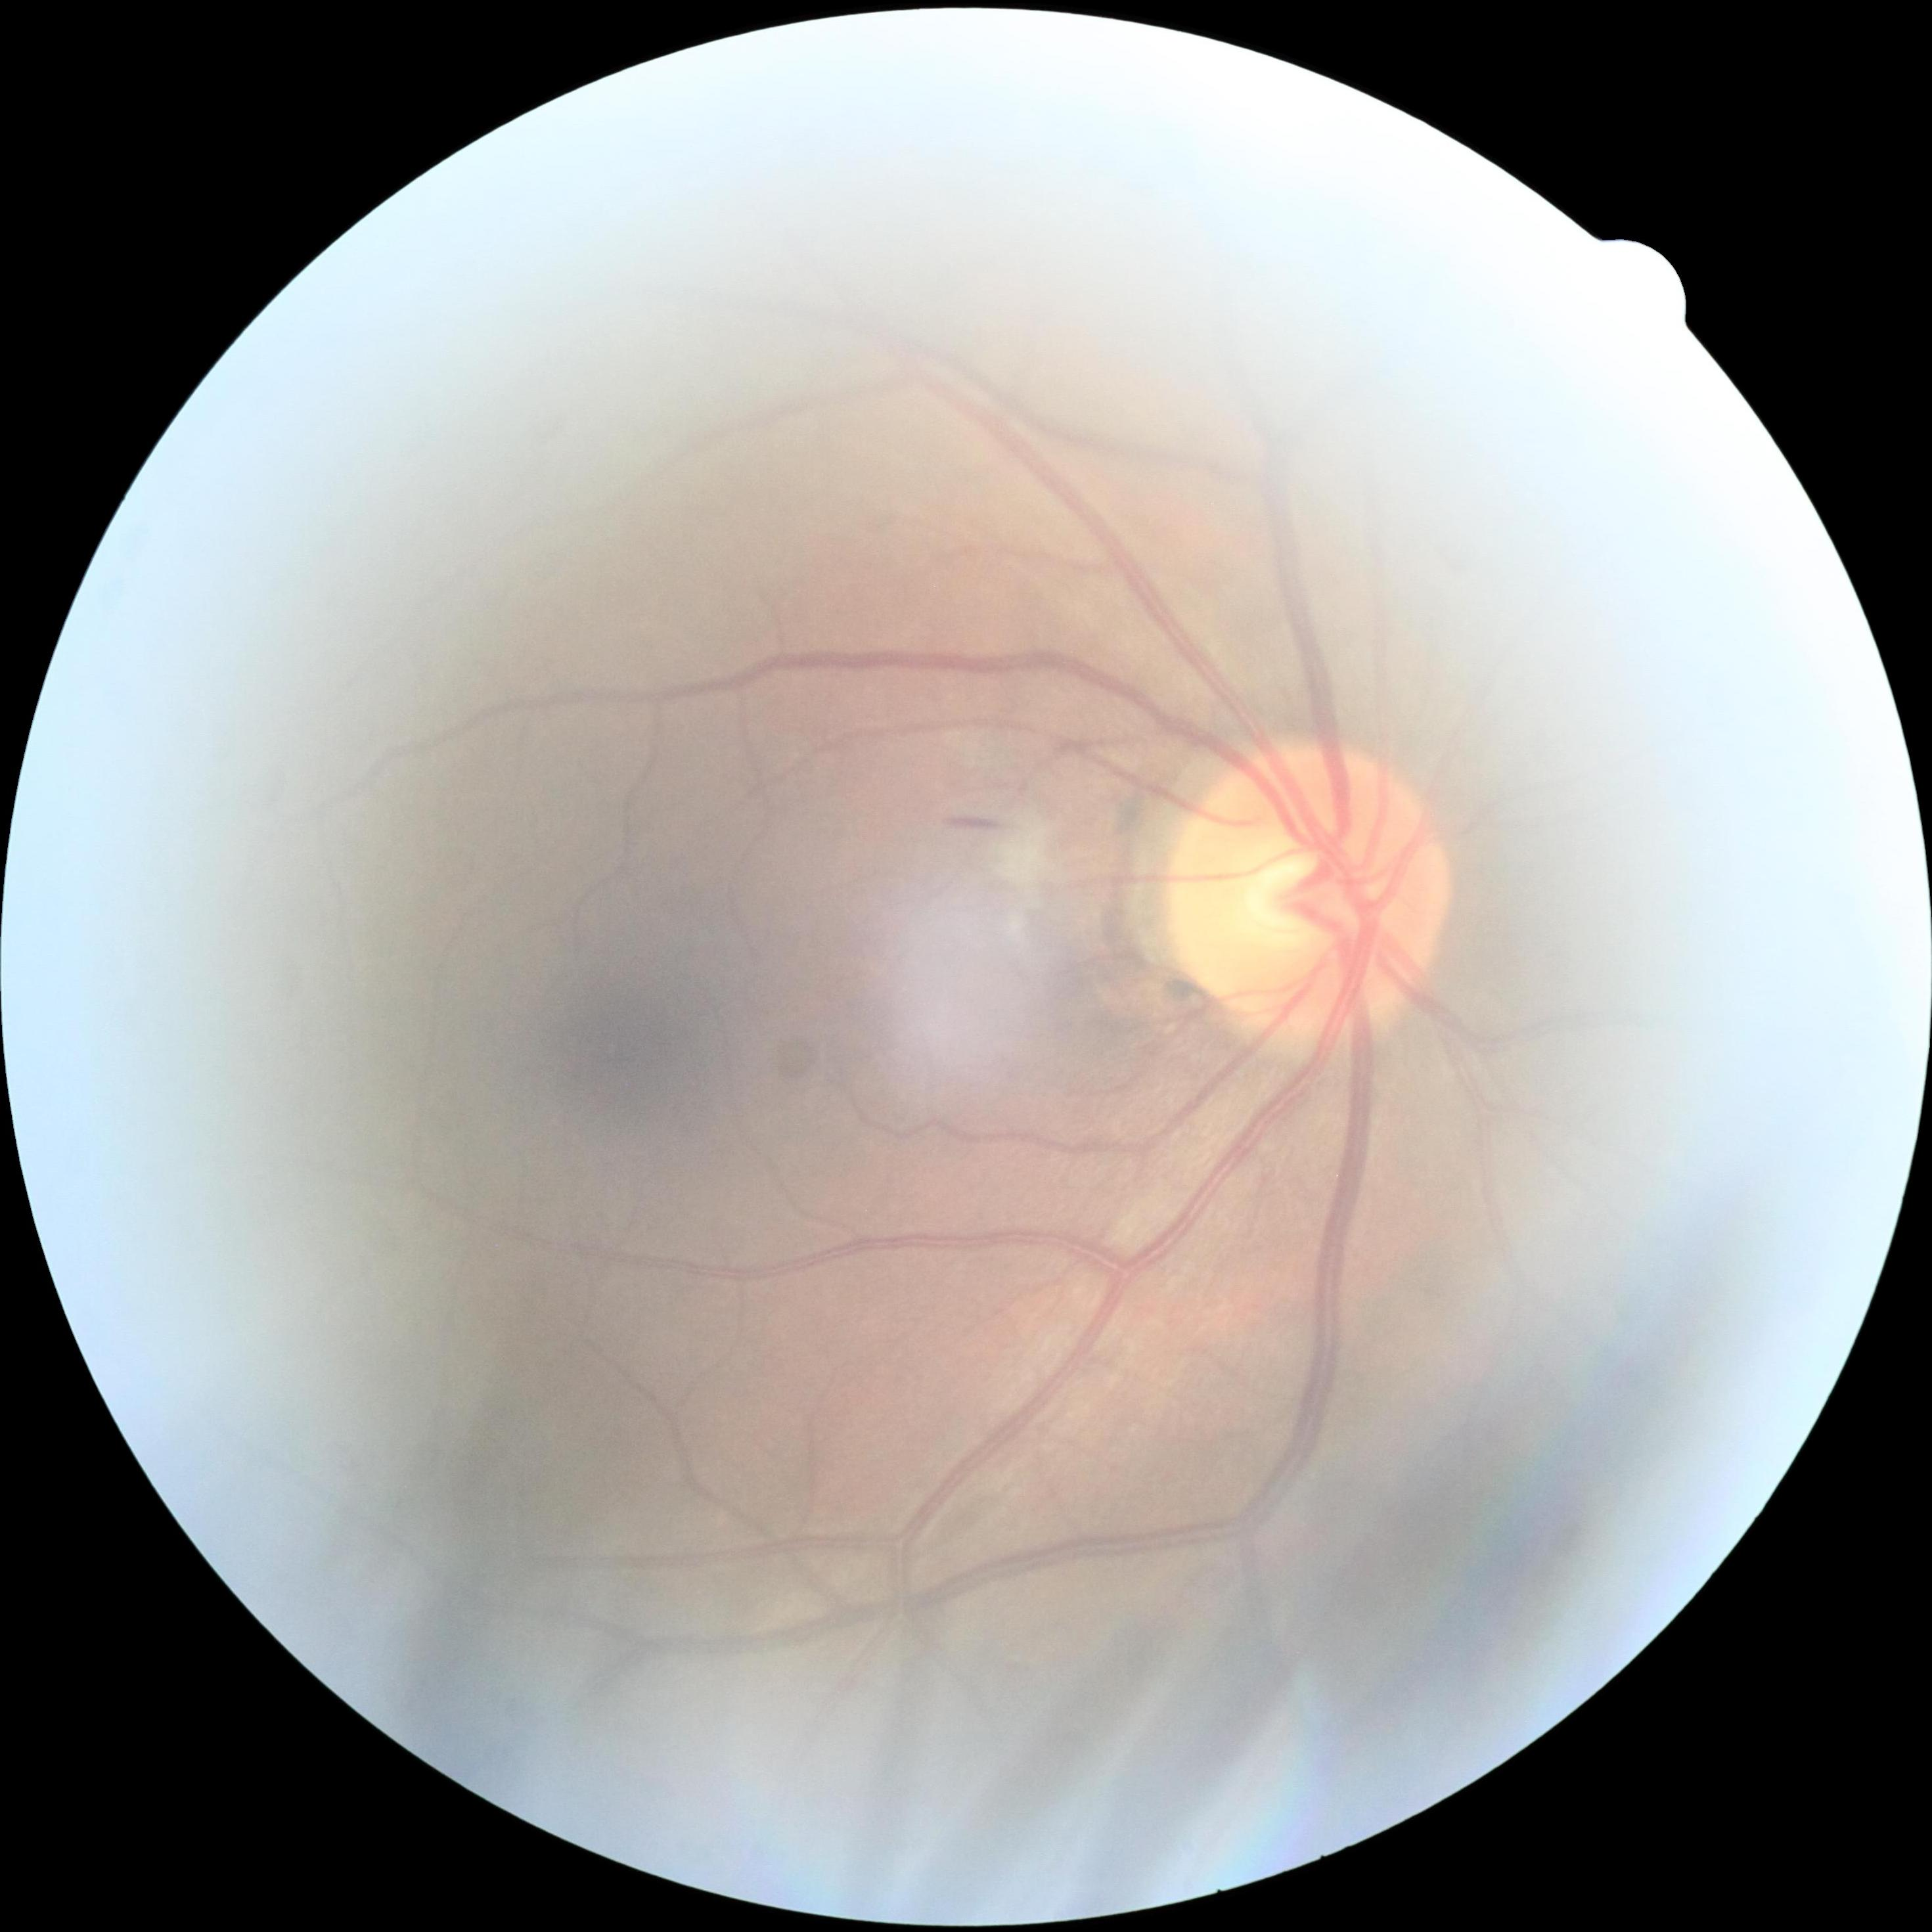

In [82]:
Image.open(image_name)

In [20]:
import torch 
# from torchvision.ops import sigmoid_focal_loss

In [54]:
predictions = torch.tensor([[-500, 500], [-500, 500], [-500, 500], [-500, 500]])
targets = torch.tensor([0,0,0,0])
# targets = torch.tensor([1, 1, 1, 1])
targets_onehot = torch.nn.functional.one_hot(targets, num_classes=2)


In [55]:
print(torch.sigmoid(predictions))

tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])


In [56]:
def sigmoid_focal_loss(
    inputs: torch.Tensor,
    targets: torch.Tensor,
    alpha: float = 0.25,
    gamma: float = 2,
    reduction: str = "none",
) -> torch.Tensor:
    """
    Loss used in RetinaNet for dense detection: https://arxiv.org/abs/1708.02002.

    Args:
        inputs (Tensor): A float tensor of arbitrary shape.
                The predictions for each example.
        targets (Tensor): A float tensor with the same shape as inputs. Stores the binary
                classification label for each element in inputs
                (0 for the negative class and 1 for the positive class).
        alpha (float): Weighting factor in range (0,1) to balance
                positive vs negative examples or -1 for ignore. Default: ``0.25``.
        gamma (float): Exponent of the modulating factor (1 - p_t) to
                balance easy vs hard examples. Default: ``2``.
        reduction (string): ``'none'`` | ``'mean'`` | ``'sum'``
                ``'none'``: No reduction will be applied to the output.
                ``'mean'``: The output will be averaged.
                ``'sum'``: The output will be summed. Default: ``'none'``.
    Returns:
        Loss tensor with the reduction option applied.
    """
    # Original implementation from https://github.com/facebookresearch/fvcore/blob/master/fvcore/nn/focal_loss.py

    p = torch.sigmoid(inputs)
    ce_loss = torch.nn.functional.binary_cross_entropy_with_logits(inputs, targets, reduction="none")
    print(ce_loss)
    p_t = p * targets + (1 - p) * (1 - targets)
    loss = ce_loss * ((1 - p_t) ** gamma)

    if alpha >= 0:
        alpha_t = alpha * targets + (1 - alpha) * (1 - targets)
        loss = alpha_t * loss

    # Check reduction option and return loss accordingly
    if reduction == "none":
        pass
    elif reduction == "mean":
        loss = loss.mean()
    elif reduction == "sum":
        loss = loss.sum()
    else:
        raise ValueError(
            f"Invalid Value for arg 'reduction': '{reduction} \n Supported reduction modes: 'none', 'mean', 'sum'"
        )
    return loss


In [57]:
alpha = -1#0.25  # defaults
gamma = 0#2.0 # defaluts

loss = sigmoid_focal_loss(predictions.float(), targets_onehot.float(), alpha=alpha, gamma=gamma, reduction="mean")
loss

tensor([[500., 500.],
        [500., 500.],
        [500., 500.],
        [500., 500.]])


tensor(500.)

In [2]:
import torch
from monai.losses import FocalLoss

pred = torch.tensor([[-500, 500], [-500, 500], [-500, 500]], dtype=torch.float32)
grnd = torch.tensor([1, 1, 1], dtype=torch.int64)
fl = FocalLoss(to_onehot_y=True, gamma=0.0, alpha=None, reduction="mean")
fl(pred, grnd)

tensor(0.)

In [5]:
pred.shape

torch.Size([3, 2])